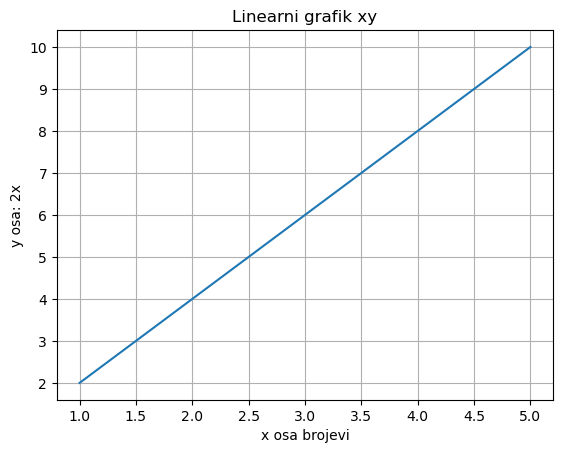

In [2]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y = [2,4,6,8,10]

plt.plot(x,y)
plt.title("Linearni grafik xy")
plt.xlabel("x osa brojevi")
plt.ylabel("y osa: 2x")
plt.grid(True)
plt.show()

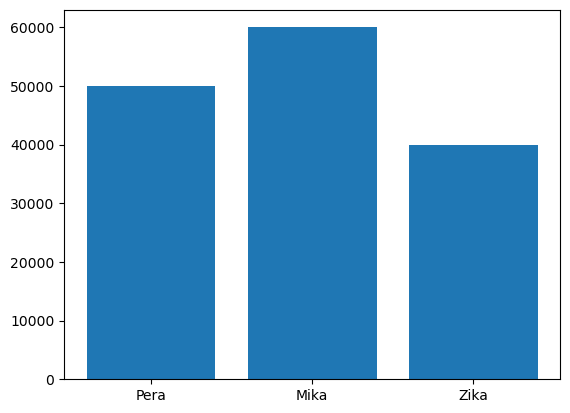

In [3]:
import matplotlib.pyplot as plt

imena = ["Pera", "Mika", "Zika"]
plate = [50000, 60000, 40000]

plt.bar(imena, plate)
plt.show()

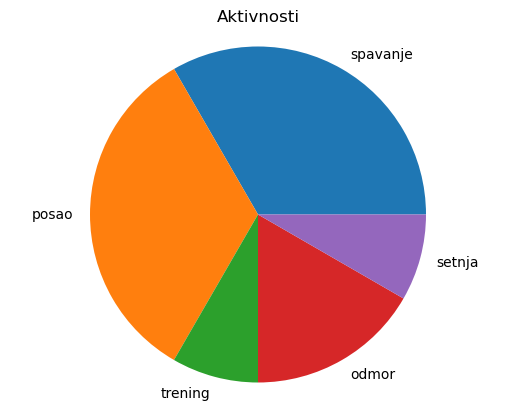

In [7]:
import matplotlib.pyplot as plt

aktivnosti = ["spavanje", "posao", "trening", "odmor", "setnja"]
sati = [8,8,2,4,2]

plt.pie(sati, labels=aktivnosti)
plt.axis('equal')
plt.title("Aktivnosti")
plt.show()

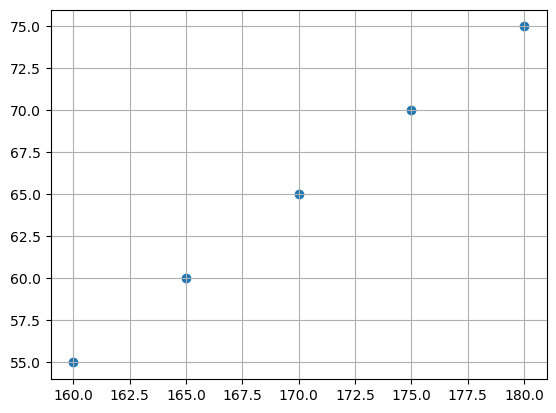

In [9]:
import matplotlib.pyplot as plt

visina = [160, 165, 170, 175, 180]
tezina = [55, 60, 65, 70, 75]

plt.scatter(visina, tezina)
plt.grid(True)
plt.show()

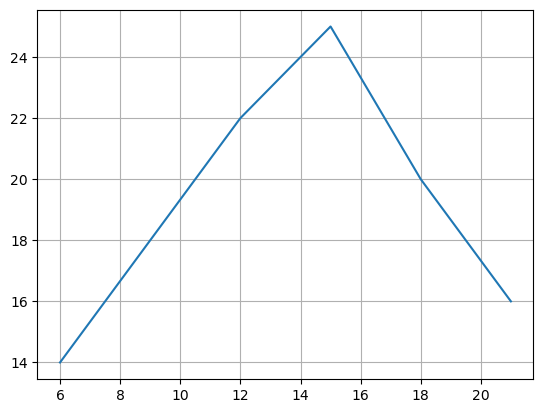

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/Dejan/Desktop/Jelena/podaci.csv')
#Ako se fajl nalazi na istoj lokaciji kao jupyter file, dovoljno je navesti samo naziv fajla
#Ako se nalazi u podfolderu, npr podaci/podaci.csv
#Ako je na nekoj drugoj lokaciji proslediti celu putanju
plt.plot(df['Vreme'], df['Temperatura'])
plt.grid(True)
plt.show()

7
142
973
[10, 48, 29, 22, 11, 18, 4]


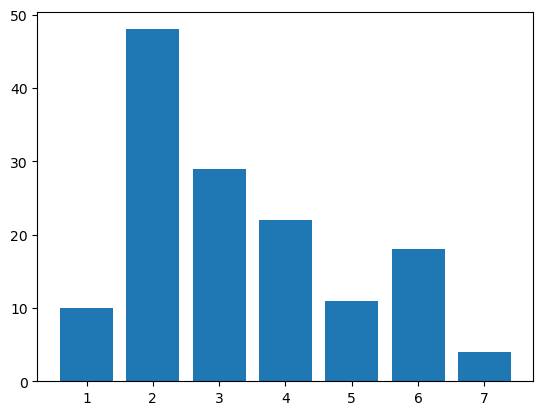

In [24]:
with open("tekst.txt", "r", encoding="utf-8") as f:
    linije = f.readlines()

broj_linija = len(linije)
print(broj_linija)

broj_reci = sum(len(linija.split()) for linija in linije)
print(broj_reci)

###
#broj_reci = 0
#for linija in linije:
#    reci = linija.split()
#    broj_reci_u_liniji = len(reci)
#    broj_reci += broj_reci_u_liniji

#print(broj_reci)
###

broj_karaktera = sum(len(linija) for linija in linije)
print(broj_karaktera)

broj_reci_po_redu = [len(linija.split()) for linija in linije]
print(broj_reci_po_redu)

import matplotlib.pyplot as plt

plt.bar(range(1, len(broj_reci_po_redu)+1), broj_reci_po_redu)
plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("temperatura.csv")
prosek = df["temperatura"].mean()
####
temp = df["temperatura"]
print(temp)
suma = 0
for tmp in temp:
    suma += tmp

print(suma)
print(suma/len(temp))
####
print(prosek)

0     5
1     7
2     6
3     4
4     6
5     4
6     5
7     5
8     7
9     6
10    4
11    3
Name: temperatura, dtype: int64
62
5.166666666666667
5.166666666666667


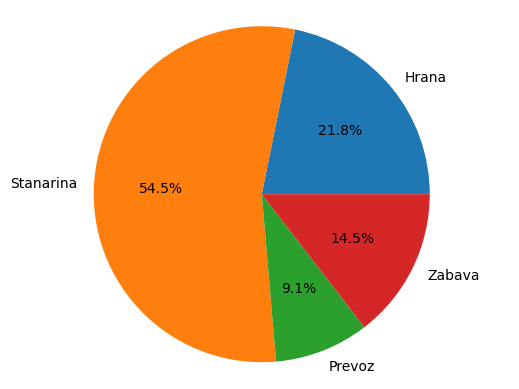

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("troskovi.csv")

plt.pie(df["iznos"], labels=df["kategorija"], autopct="%1.1f%%")
plt.axis("equal")
plt.show()

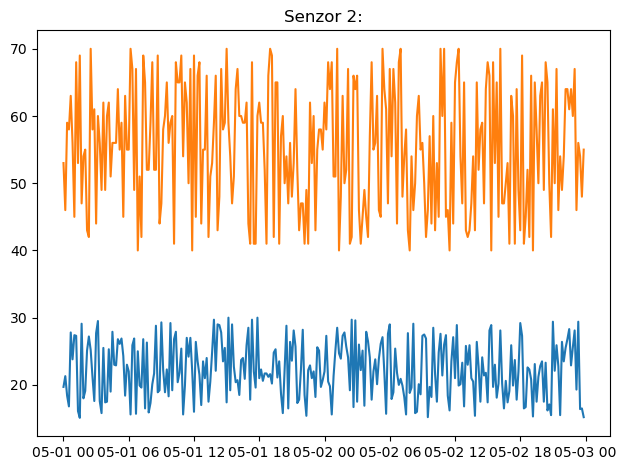

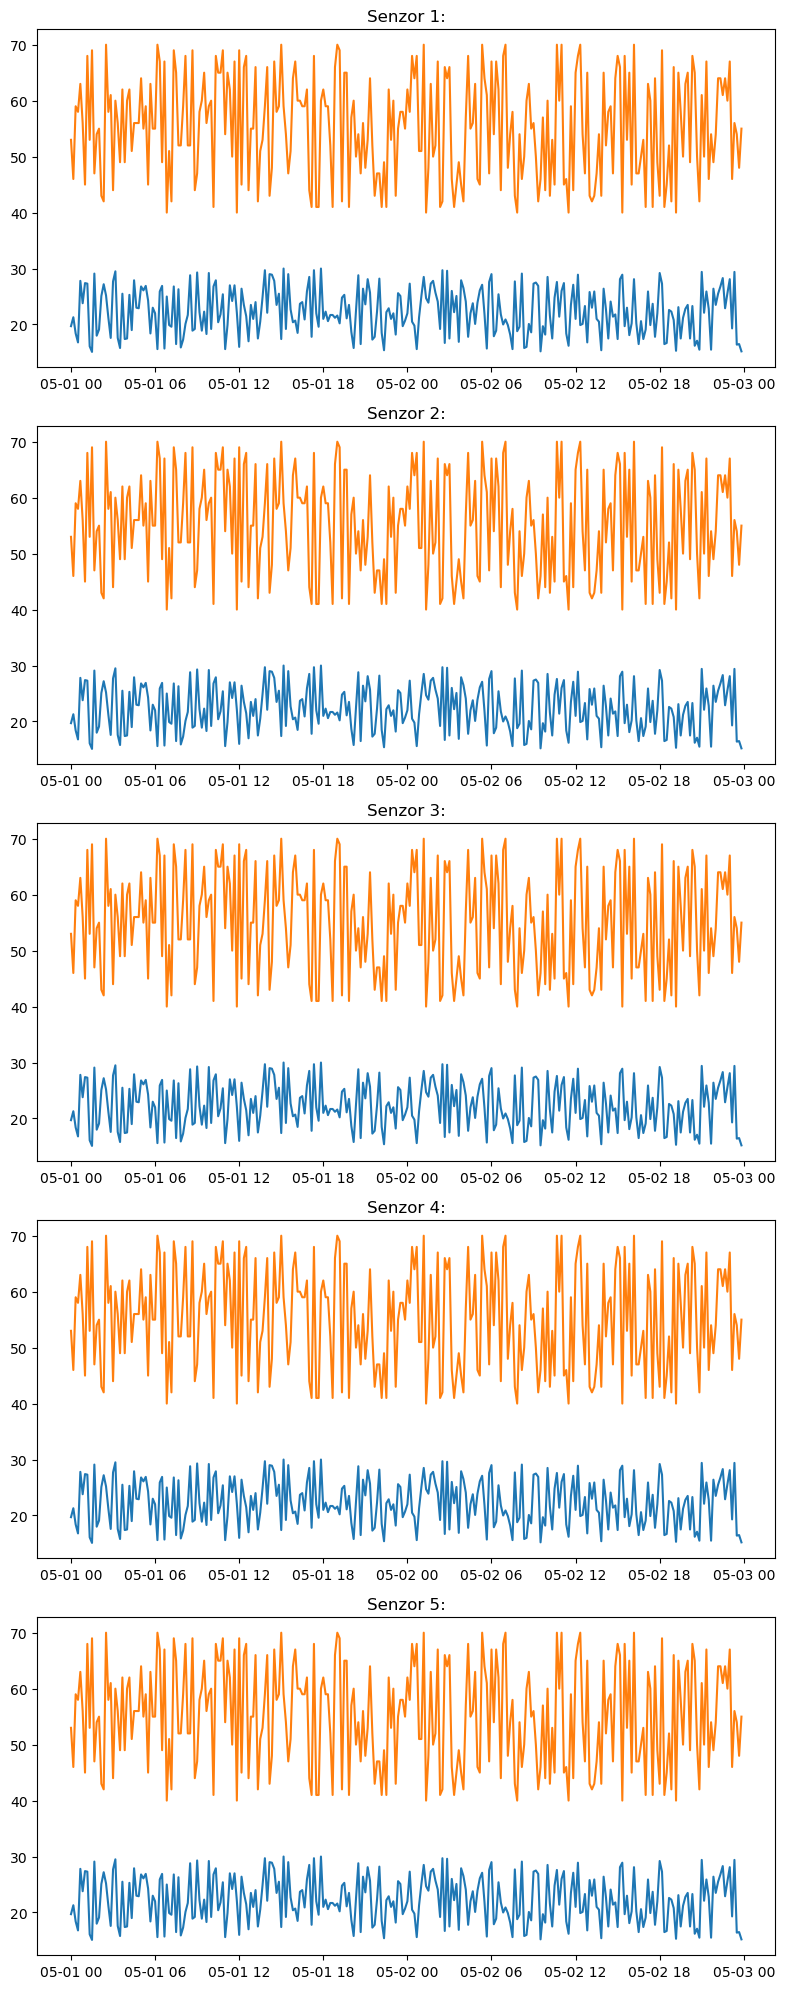

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("senzori_log.csv", parse_dates=["vreme"])

#senzor 2
senzor_id = 2
df_senzor = df[df["senzor_id"] == senzor_id]

plt.plot(df_senzor["vreme"], df_senzor["temperatura"], label="Temperatura")
plt.plot(df_senzor["vreme"], df_senzor["vlaga"], label="Vlaga")
plt.title(f"Senzor {senzor_id}:")
plt.tight_layout()
plt.show()

senzori = df["senzor_id"].unique()
fig, axs = plt.subplots(len(senzori), 1, figsize=(8, 4*len(senzori)))

for i, sid in enumerate(senzori):
    podaci = df[df["senzor_id"] == sid]
    axs[i].plot(df_senzor["vreme"], df_senzor["temperatura"], label="Temperatura")
    axs[i].plot(df_senzor["vreme"], df_senzor["vlaga"], label="Vlaga")
    axs[i].set_title(f"Senzor {sid}:")

plt.tight_layout()
plt.show()

region
Beograd     38076.81
Niš         37841.93
Novi Sad    38509.89
Name: vrednost, dtype: float64
kategorija
Mlečni proizvodi    2.457333
Pekara              2.468889
Name: cena, dtype: float64


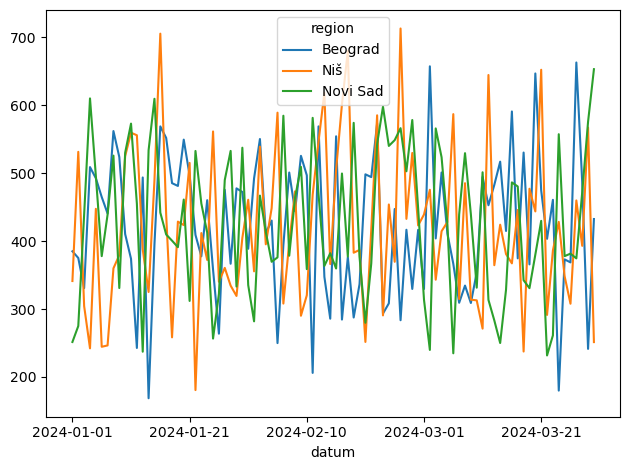

In [55]:
#grupisanje po kriterijumu
#izracunati ukupnu vrednost po regionima
#prosecnu cenu po kategoriji
#grafik - ukupna vrednost po danima i regionima

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("prodaja_slozeno.csv")
df["vrednost"] = df["kolicina"] * df["cena"]

vrednost_po_regionu = df.groupby("region")["vrednost"].sum()
print(vrednost_po_regionu)

prosecna_cena = df.groupby("kategorija")["cena"].mean()
print(prosecna_cena)

po_danu_i_regionu = df.groupby(["datum", "region"])["vrednost"].sum().unstack()

po_danu_i_regionu.plot()
plt.tight_layout()
plt.show()

status_code
200    854
404    101
500     45
Name: count, dtype: int64
user_id
user_1     109
user_6     108
user_3     107
user_8     106
user_10    102
user_7      97
user_2      95
user_5      94
user_4      91
user_9      91
Name: count, dtype: int64


<Axes: xlabel='sat'>

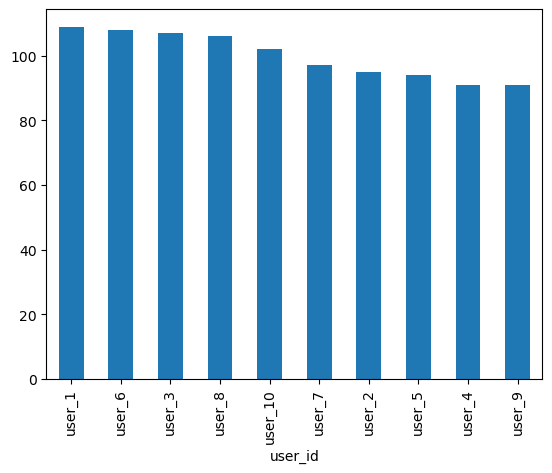

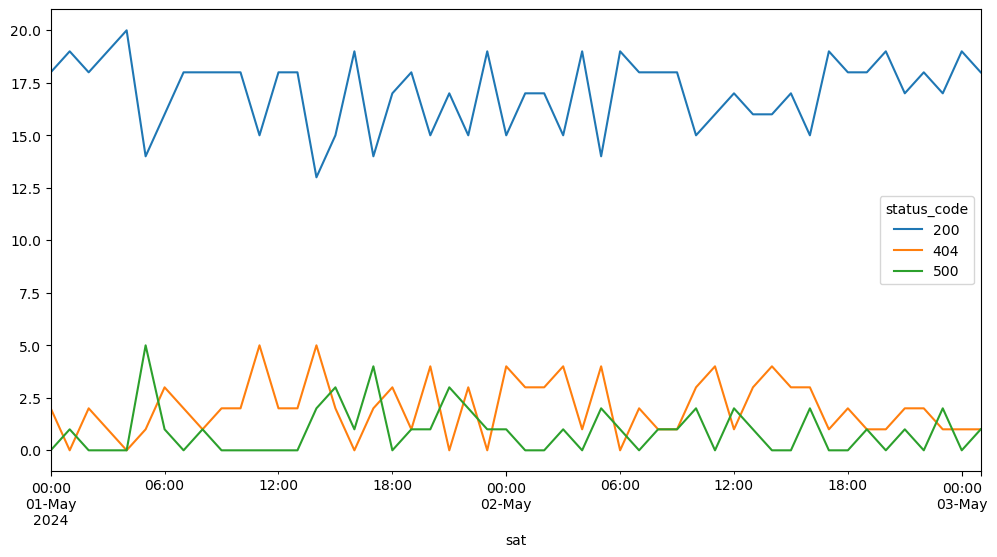

In [72]:
#grupisanje
#broj status kodova
#broj poslatih zahteva po korisniku
#broj status kodova po satu

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("web_logs.csv", parse_dates=["timestamp"])

br_status_kodova = df["status_code"].value_counts()
print(br_status_kodova)

zahtevi_po_korisniku = df["user_id"].value_counts()
zahtevi_po_korisniku.plot(kind='bar')
print(zahtevi_po_korisniku)

df["sat"] = df["timestamp"].dt.floor("h")
br_kodova_po_satu = df.groupby(["sat", "status_code"]).size().unstack(fill_value=0)
br_kodova_po_satu.plot(figsize=(12,6))
